In [1]:
import pandas as pd

In [19]:
loans_df=pd.read_csv("G:\\data\\application_train.csv")

In [20]:
test_df=pd.read_csv("G:\\data\\application_test.csv")

In [13]:
pd.read_csv("G:\\data\\HomeCredit_columns_description.csv", encoding='ISO-8859-1')

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [22]:
bureau_df=pd.read_csv("G:\\data\\bureau.csv")
previous_application_df= pd.read_csv("G:\\data\\previous_application.csv")

In [26]:
data_df= loans_df.copy()

In [27]:
data_df.TARGET.value_counts()

TARGET
0    190779
1     16732
Name: count, dtype: int64

In [43]:
# Example of one-hot encoding
loans_df_encoded = pd.get_dummies(loans_df, drop_first=True)
loans_df_encoded.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,1.000000,-0.004434,-0.001674,0.001219,-0.000578,-0.002744,-0.000431,-0.000652,-0.000539,-0.001393,...,-0.001765,0.003770,0.003270,-0.001712,0.004095,-0.000848,0.002850,0.000067,-0.000924,0.001435
TARGET,-0.004434,1.000000,0.019462,-0.019405,-0.029954,-0.013571,-0.039321,-0.036660,0.078916,-0.045682,...,-0.010390,0.006016,0.001496,-0.001224,-0.008211,-0.000099,-0.032561,-0.011609,0.008865,0.006141
CNT_CHILDREN,-0.001674,0.019462,1.000000,0.023295,0.000882,0.018526,-0.002792,-0.026674,0.331407,-0.239788,...,-0.003801,-0.000637,-0.001361,-0.001303,0.001220,-0.003137,-0.021224,-0.024174,0.009637,0.002797
AMT_INCOME_TOTAL,0.001219,-0.019405,0.023295,1.000000,0.333222,0.408714,0.339578,0.160301,0.054666,-0.135172,...,0.017751,-0.003836,0.001630,0.012797,0.049870,0.007526,0.070087,0.029427,-0.006191,-0.004869
AMT_CREDIT,-0.000578,-0.029954,0.000882,0.333222,1.000000,0.768660,0.986996,0.099042,-0.054244,-0.066560,...,0.010412,-0.005100,-0.000258,0.009633,0.030378,0.006212,0.046255,0.008341,-0.007048,-0.004260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WALLSMATERIAL_MODE_Others,-0.000848,-0.000099,-0.003137,0.007526,0.006212,0.006633,0.006264,0.013332,-0.000144,-0.004002,...,-0.004429,0.004545,0.047821,-0.006260,-0.005471,1.000000,-0.037927,-0.037385,-0.009664,0.052542
WALLSMATERIAL_MODE_Panel,0.002850,-0.032561,-0.021224,0.070087,0.046255,0.055197,0.049350,0.092986,-0.011756,-0.004888,...,0.130732,-0.012640,-0.019550,-0.045211,-0.039512,-0.037927,1.000000,-0.270015,-0.069797,-0.038021
"WALLSMATERIAL_MODE_Stone, brick",0.000067,-0.011609,-0.024174,0.029427,0.008341,0.008928,0.011212,0.009270,-0.009604,-0.007055,...,0.103829,0.091115,0.027736,-0.044566,-0.038948,-0.037385,-0.270015,1.000000,-0.068801,-0.004264
WALLSMATERIAL_MODE_Wooden,-0.000924,0.008865,0.009637,-0.006191,-0.007048,-0.006806,-0.008615,-0.056905,0.009583,-0.002635,...,0.001780,0.000724,0.122754,-0.011520,-0.010068,-0.009664,-0.069797,-0.068801,1.000000,0.258115


In [44]:
selected_columns= ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG']

In [45]:
data_df = data_df [selected_columns]
test_df1= test_df[['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG']]
data_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OWN_CAR_AGE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG
0,216091,0,Cash loans,F,Y,Y,0,135000.0,270000.0,18112.5,...,3.0,2,2,TUESDAY,9,Business Entity Type 1,NaN,0.561794,0.740799,0.0186
1,216092,0,Revolving loans,F,Y,Y,1,1125000.0,1350000.0,67500.0,...,3.0,1,1,MONDAY,19,Business Entity Type 3,0.605996,0.739501,0.644679,0.2852
2,216093,0,Cash loans,F,N,Y,2,112500.0,291384.0,23490.0,...,NaN,2,2,SATURDAY,11,Trade: type 7,0.516458,0.608057,0.651260,0.2227
3,216094,0,Cash loans,F,N,N,0,112500.0,835380.0,40189.5,...,NaN,2,2,THURSDAY,16,Medicine,NaN,0.519509,0.739412,NaN
4,216095,0,Cash loans,F,Y,Y,0,112500.0,765261.0,32422.5,...,7.0,2,2,TUESDAY,10,XNA,NaN,0.334237,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,1,1,THURSDAY,15,Services,0.145570,0.681632,NaN,0.2021
207507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,2,2,MONDAY,8,XNA,NaN,0.115992,NaN,0.0247
207508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,NaN,3,3,THURSDAY,9,School,0.744026,0.535722,0.218859,0.1031
207509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,NaN,2,2,WEDNESDAY,9,Business Entity Type 1,NaN,0.514163,0.661024,0.0124


In [46]:
previous_active_counts= bureau_df[bureau_df.CREDIT_ACTIVE== 'Active'].groupby ('SK_ID_CURR', as_index= False) ['SK_ID_BUREAU'].count().rename (columns= {'SK_ID_BUREAU': 'previous_active_counts' })
previous_active_counts

,SK_ID_CURR,previous_active_counts
0,100001,3
1,100002,2
2,100003,1
3,100005,2
4,100008,1
...,...,...
251810,456247,3
251811,456249,2
251812,456250,2
251813,456253,2


In [47]:
previous_closed_counts= bureau_df[bureau_df.CREDIT_ACTIVE== 'Closed'].groupby ('SK_ID_CURR', as_index= False) ['SK_ID_BUREAU'].count().rename (columns= {'SK_ID_BUREAU': 'previous_closed_counts' })
previous_closed_counts

,SK_ID_CURR,previous_closed_counts
0,100001,4
1,100002,6
2,100003,3
3,100004,2
4,100005,1
...,...,...
267920,456249,11
267921,456250,1
267922,456253,2
267923,456254,1


In [48]:
merged_df= data_df.merge (previous_closed_counts, on= "SK_ID_CURR", how= 'left')
merged_df= merged_df.merge (previous_active_counts, on= "SK_ID_CURR", how= 'left')

test_df1= test_df1.merge (previous_closed_counts, on= "SK_ID_CURR", how= 'left')
test_df1= test_df1.merge (previous_active_counts, on= "SK_ID_CURR", how= 'left')
test_df1

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,previous_closed_counts,previous_active_counts
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,2,WEDNESDAY,10,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,6.0,2.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,1,MONDAY,11,School,0.311267,0.622246,NaN,0.0959,3.0,1.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,2,MONDAY,9,Government,NaN,0.555912,0.729567,NaN,2.0,NaN
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,2,WEDNESDAY,17,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,2,THURSDAY,11,Religion,NaN,0.322738,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,Cash loans,F,N,Y,1,157500.0,755190.0,36459.0,675000.0,...,2,MONDAY,10,Postal,NaN,0.488676,NaN,NaN,NaN,NaN
99996,216087,Cash loans,F,N,Y,1,225000.0,284400.0,22599.0,225000.0,...,2,TUESDAY,12,Hotel,0.720055,0.539071,0.576209,0.1830,8.0,1.0
99997,216088,Cash loans,F,Y,Y,0,135000.0,1262583.0,37044.0,1102500.0,...,2,TUESDAY,10,Self-employed,NaN,0.605584,0.786267,0.1294,2.0,2.0
99998,216089,Cash loans,F,Y,N,0,135000.0,225000.0,6579.0,225000.0,...,2,FRIDAY,12,Business Entity Type 3,0.398054,0.611289,NaN,0.1155,1.0,NaN


In [49]:
merged_df['previous_active_counts']= merged_df['previous_active_counts'].fillna(0)
merged_df['previous_closed_counts']= merged_df['previous_closed_counts'].fillna(0)
test_df1['previous_active_counts']= test_df1['previous_active_counts'].fillna(0)
test_df1['previous_closed_counts']= test_df1['previous_closed_counts'].fillna(0)

In [56]:
import numpy as np
# Assuming merged_df is your original DataFrame
numeric_df = merged_df.select_dtypes(include=[np.number])

# Now, calculate the correlation matrix
correlation_matrix = numeric_df.corr()
correlation_matrix 


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OWN_CAR_AGE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,previous_closed_counts,previous_active_counts
SK_ID_CURR,1.000000,-0.004434,-0.001674,0.001219,-0.000578,-0.002744,-0.000431,-0.000652,-0.000539,-0.001393,...,-0.000332,-0.000526,-0.000616,-0.001492,0.005187,0.003640,-0.000811,0.002545,0.002942,0.003760
TARGET,-0.004434,1.000000,0.019462,-0.019405,-0.029954,-0.013571,-0.039321,-0.036660,0.078916,-0.045682,...,0.034866,0.057593,0.059962,-0.022857,-0.156379,-0.159897,-0.179007,-0.029602,-0.038084,0.041692
CNT_CHILDREN,-0.001674,0.019462,1.000000,0.023295,0.000882,0.018526,-0.002792,-0.026674,0.331407,-0.239788,...,0.006695,0.026883,0.026960,-0.008558,-0.137229,-0.019946,-0.042235,-0.011095,0.006495,0.015541
AMT_INCOME_TOTAL,0.001219,-0.019405,0.023295,1.000000,0.333222,0.408714,0.339578,0.160301,0.054666,-0.135172,...,-0.110566,-0.180852,-0.194246,0.076329,0.073494,0.138232,-0.067209,0.101862,0.081567,0.129167
AMT_CREDIT,-0.000578,-0.029954,0.000882,0.333222,1.000000,0.768660,0.986996,0.099042,-0.054244,-0.066560,...,-0.096817,-0.100872,-0.110115,0.052193,0.168280,0.129913,0.042991,0.062316,0.058637,0.048478
AMT_ANNUITY,-0.002744,-0.013571,0.018526,0.408714,0.768660,1.000000,0.773773,0.117726,0.009250,-0.102845,...,-0.097820,-0.129165,-0.141914,0.053452,0.120403,0.125593,0.031251,0.079069,0.031941,-0.002004
AMT_GOODS_PRICE,-0.000431,-0.039321,-0.002792,0.339578,0.986996,0.773773,1.000000,0.102479,-0.052077,-0.064887,...,-0.106548,-0.102516,-0.111019,0.061773,0.175119,0.137534,0.047013,0.066515,0.063363,0.047353
REGION_POPULATION_RELATIVE,-0.000652,-0.036660,-0.026674,0.160301,0.099042,0.117726,0.102479,1.000000,-0.028790,-0.003440,...,-0.079863,-0.532508,-0.531084,0.171977,0.099241,0.197492,-0.004308,0.208697,-0.041481,-0.019635
DAYS_BIRTH,-0.000539,0.078916,0.331407,0.054666,-0.054244,0.009250,-0.052077,-0.028790,1.000000,-0.616761,...,0.003855,0.006620,0.005716,0.089931,-0.598966,-0.091802,-0.203359,0.004702,-0.087603,-0.009608
DAYS_EMPLOYED,-0.001393,-0.045682,-0.239788,-0.135172,-0.066560,-0.102845,-0.064887,-0.003440,-0.616761,1.000000,...,0.032602,0.032991,0.034749,-0.091299,0.289887,-0.020861,0.113632,-0.017259,0.001470,-0.042035


In [57]:
previous_application_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [58]:
previous_application_df.NAME_CONTRACT_STATUS.value_counts()

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64

In [59]:
previous_approved_counts= previous_application_df[previous_application_df.NAME_CONTRACT_STATUS== 'Approved'].groupby ('SK_ID_CURR', as_index= False) ['SK_ID_PREV'].count().rename (columns= {'SK_ID_PREV': 'previous_approved_counts' })
previous_approved_counts

,SK_ID_CURR,previous_approved_counts
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,1
...,...,...
337693,456251,1
337694,456252,1
337695,456253,2
337696,456254,2


In [60]:
previous_Canceled_counts= previous_application_df[previous_application_df.NAME_CONTRACT_STATUS == 'Canceled'].groupby ('SK_ID_CURR', as_index= False) ['SK_ID_PREV'].count().rename (columns= {'SK_ID_PREV': 'previous_Canceled_counts' })
previous_Canceled_counts

,SK_ID_CURR,previous_Canceled_counts
0,100005,1
1,100006,3
2,100008,1
3,100012,1
4,100013,1
...,...,...
132689,456237,2
132690,456240,1
132691,456241,3
132692,456244,5


In [61]:
previous_refused_counts= previous_application_df[previous_application_df.NAME_CONTRACT_STATUS == 'Refused'].groupby ('SK_ID_CURR', as_index= False) ['SK_ID_PREV'].count().rename (columns= {'SK_ID_PREV': 'previous_refused_counts' })
previous_refused_counts

,SK_ID_CURR,previous_refused_counts
0,100006,1
1,100011,1
2,100027,1
3,100030,10
4,100035,8
...,...,...
118272,456244,1
118273,456247,1
118274,456249,1
118275,456250,1


In [62]:
merged_df= merged_df.merge (previous_approved_counts, on= "SK_ID_CURR", how= 'left')
merged_df= merged_df.merge (previous_Canceled_counts, on= "SK_ID_CURR", how= 'left')
merged_df= merged_df.merge (previous_refused_counts, on= "SK_ID_CURR", how= 'left')

merged_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,previous_closed_counts,previous_active_counts,previous_approved_counts,previous_Canceled_counts,previous_refused_counts
0,216091,0,Cash loans,F,Y,Y,0,135000.0,270000.0,18112.5,...,Business Entity Type 1,NaN,0.561794,0.740799,0.0186,5.0,2.0,5.0,2.0,1.0
1,216092,0,Revolving loans,F,Y,Y,1,1125000.0,1350000.0,67500.0,...,Business Entity Type 3,0.605996,0.739501,0.644679,0.2852,1.0,0.0,NaN,NaN,NaN
2,216093,0,Cash loans,F,N,Y,2,112500.0,291384.0,23490.0,...,Trade: type 7,0.516458,0.608057,0.651260,0.2227,1.0,0.0,4.0,2.0,2.0
3,216094,0,Cash loans,F,N,N,0,112500.0,835380.0,40189.5,...,Medicine,NaN,0.519509,0.739412,NaN,1.0,1.0,3.0,NaN,NaN
4,216095,0,Cash loans,F,Y,Y,0,112500.0,765261.0,32422.5,...,XNA,NaN,0.334237,NaN,NaN,0.0,0.0,2.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,Services,0.145570,0.681632,NaN,0.2021,0.0,0.0,1.0,NaN,NaN
207507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,XNA,NaN,0.115992,NaN,0.0247,0.0,0.0,1.0,NaN,NaN
207508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,School,0.744026,0.535722,0.218859,0.1031,2.0,2.0,2.0,NaN,NaN
207509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,Business Entity Type 1,NaN,0.514163,0.661024,0.0124,1.0,0.0,2.0,NaN,NaN


In [63]:
test_df1= test_df1.merge (previous_approved_counts, on= "SK_ID_CURR", how= 'left')
test_df1= test_df1.merge (previous_Canceled_counts, on= "SK_ID_CURR", how= 'left')
test_df1= test_df1.merge (previous_refused_counts, on= "SK_ID_CURR", how= 'left')

In [64]:
merged_df['previous_approved_counts']= merged_df['previous_approved_counts'].fillna(0)
merged_df['previous_Canceled_counts']= merged_df['previous_Canceled_counts'].fillna(0)
merged_df['previous_refused_counts']= merged_df['previous_refused_counts'].fillna(0)
test_df1['previous_approved_counts']= test_df1['previous_approved_counts'].fillna(0)
test_df1['previous_Canceled_counts']= test_df1['previous_Canceled_counts'].fillna(0)
test_df1['previous_refused_counts']= test_df1['previous_refused_counts'].fillna(0)

In [65]:
merged_df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'previous_closed_counts',
       'previous_active_counts', 'previous_approved_counts',
       'previous_Canceled_counts', 'previous_refused_counts'],
      dtype=object)

In [66]:
test_df1.columns.values

array(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'previous_closed_counts', 'previous_active_counts',
       'previous_approved_counts', 'previous_Canceled_counts',
       'previous_refused_counts'], dtype=object)

In [68]:

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [146]:
fig = px.pie(values=merged_df.NAME_FAMILY_STATUS.value_counts(), names= merged_df['NAME_FAMILY_STATUS'].unique())
fig.show()

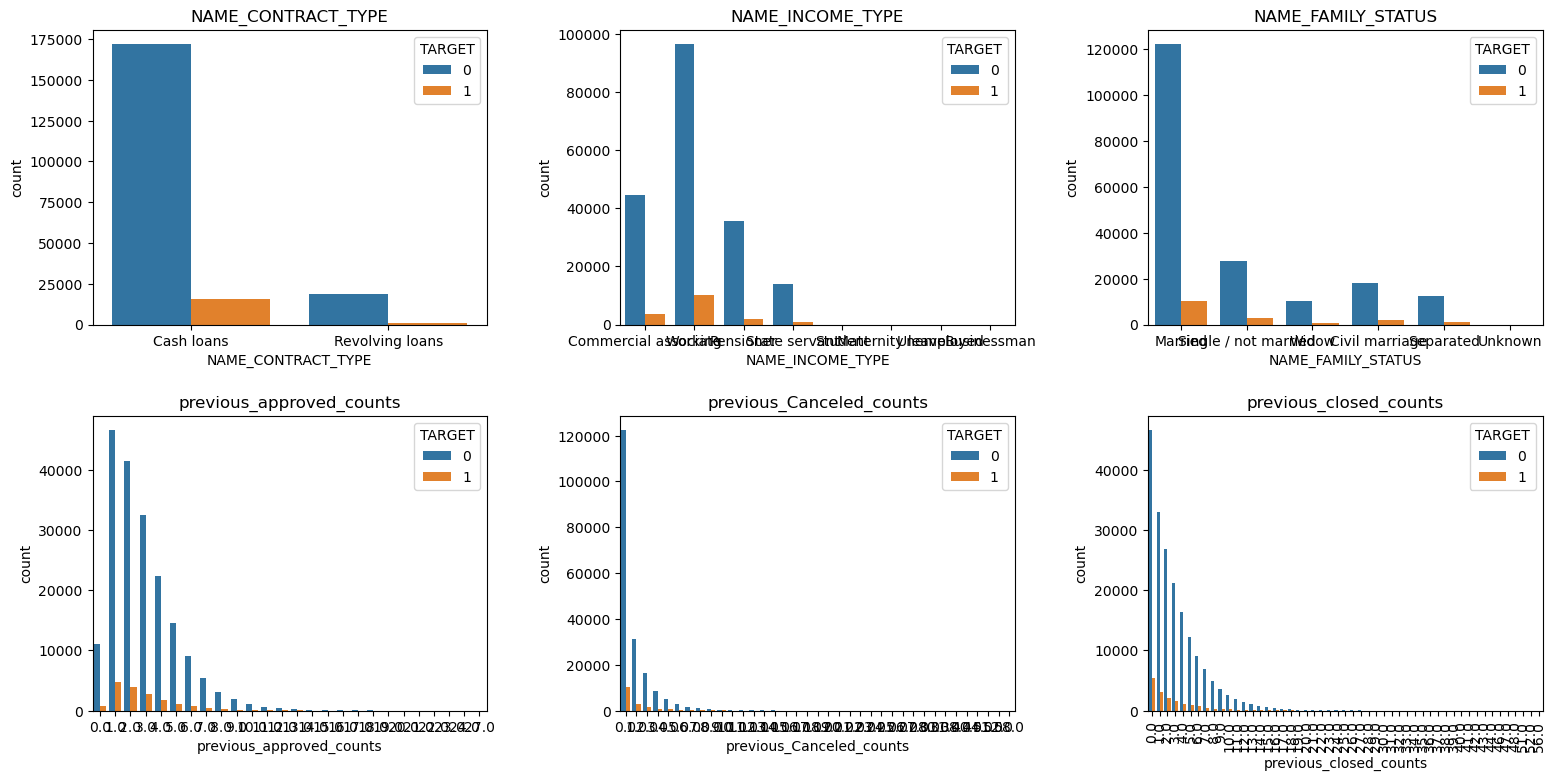

In [147]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

axes[0,0].set_title('NAME_CONTRACT_TYPE')
ax= sns.countplot(x= 'NAME_CONTRACT_TYPE',  hue= 'TARGET', data= merged_df, ax= axes[0,0])

axes[0,1].set_title('NAME_INCOME_TYPE')
ax= sns.countplot(x= 'NAME_INCOME_TYPE',  hue= 'TARGET', data= merged_df, ax= axes[0,1])


axes[0,2].set_title('NAME_FAMILY_STATUS')
ax= sns.countplot(x= 'NAME_FAMILY_STATUS',  hue= 'TARGET', data= merged_df, ax= axes[0,2])

axes[1,0].set_title('previous_approved_counts')
ax= sns.countplot(x= merged_df.previous_approved_counts,  hue= 'TARGET', data= merged_df, ax= axes[1,0])

axes[1,1].set_title('previous_Canceled_counts')
ax= sns.countplot(x= merged_df.previous_Canceled_counts,  hue= 'TARGET', data= merged_df, ax= axes[1,1])

axes[1,2].set_title('previous_closed_counts')
ax= sns.countplot(x= merged_df.previous_closed_counts,  hue= 'TARGET', data= merged_df, ax= axes[1,2])


plt.tight_layout(pad=2);
plt.xticks(rotation = 90);

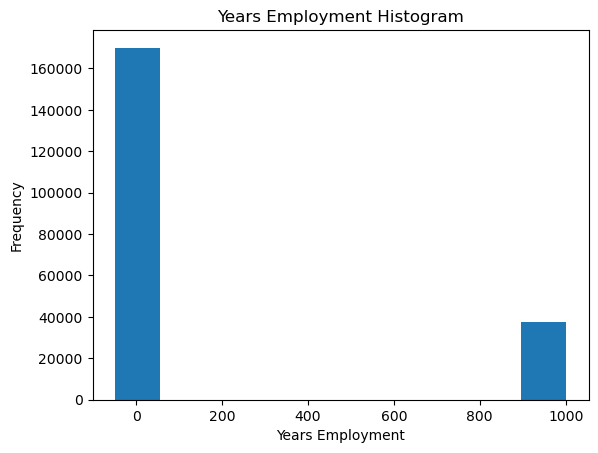

In [71]:
(merged_df.DAYS_EMPLOYED/365).plot.hist(title = 'Years Employment Histogram');
plt.xlabel('Years Employment');

In [72]:
# removing anamoly from the dataset as years employment cannot be 1000 yrs.
merged_df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [73]:
test_df1['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

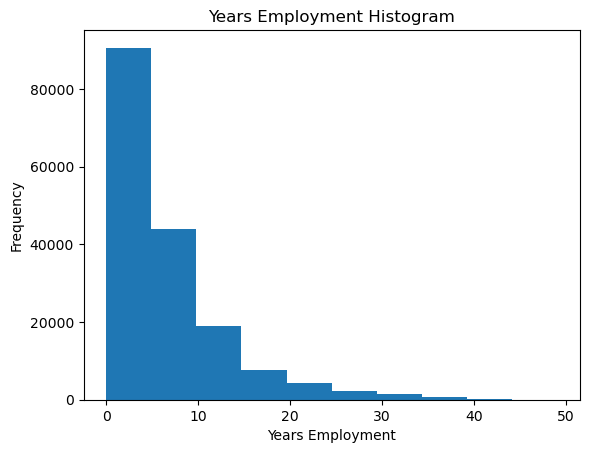

In [74]:
(merged_df.DAYS_EMPLOYED/-365).plot.hist(title = 'Years Employment Histogram');
plt.xlabel('Years Employment');

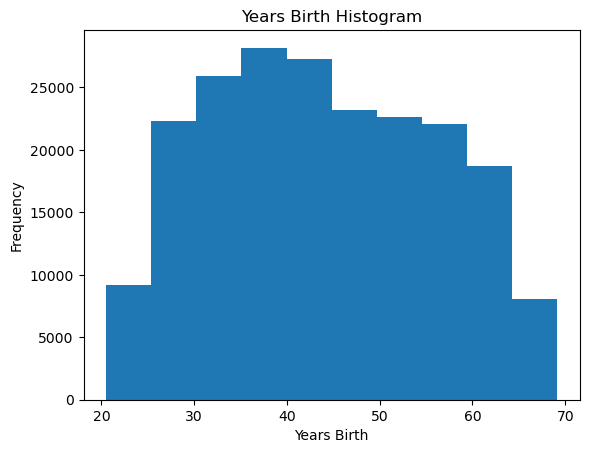

In [75]:
(merged_df.DAYS_BIRTH/-365).plot.hist(title = 'Years Birth Histogram');
plt.xlabel('Years Birth');

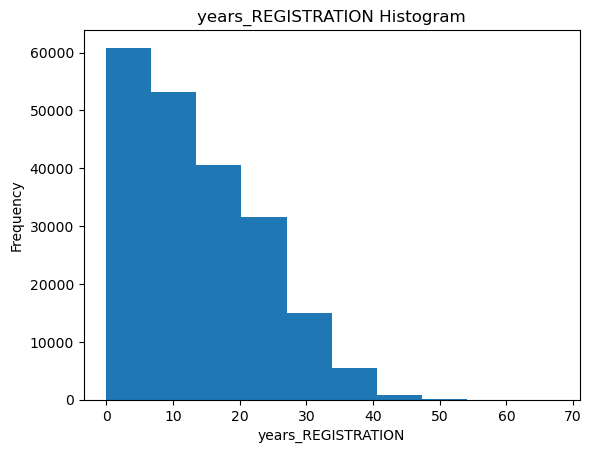

In [76]:
(merged_df.DAYS_REGISTRATION/-365).plot.hist(title = 'years_REGISTRATION Histogram');
plt.xlabel('years_REGISTRATION');

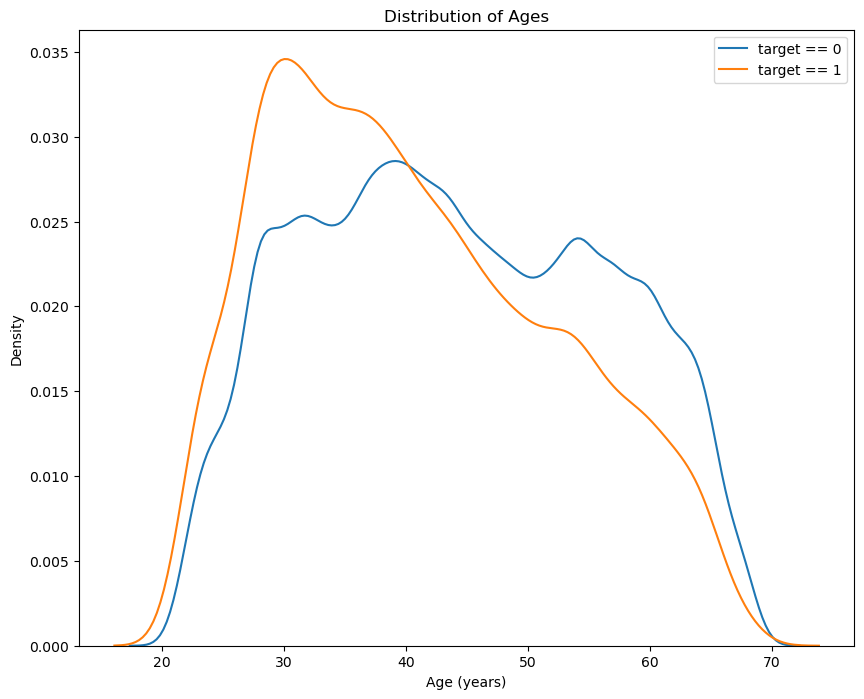

In [77]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(merged_df.loc[merged_df['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(merged_df.loc[merged_df['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.legend();

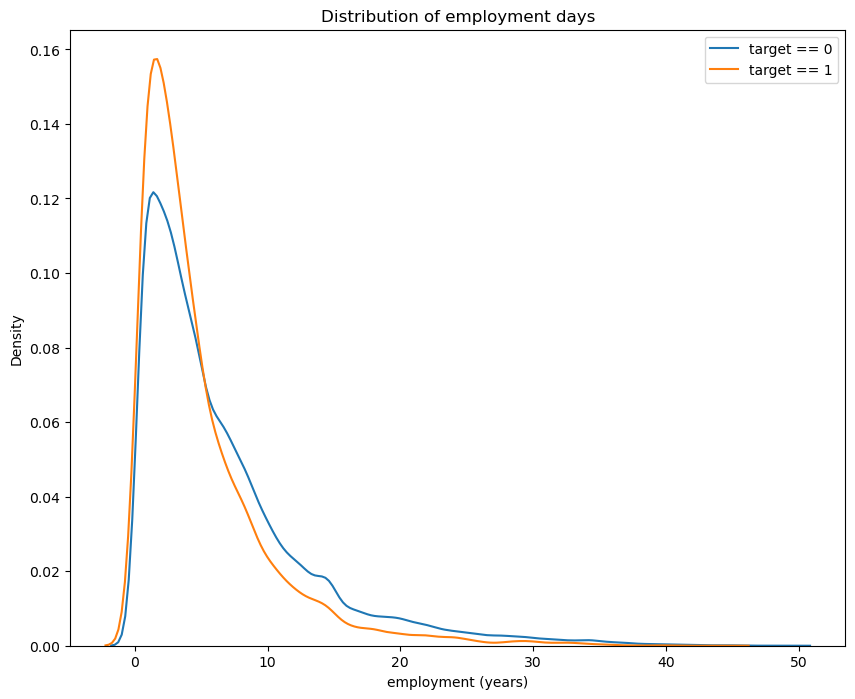

In [78]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(merged_df.loc[merged_df['TARGET'] == 0, 'DAYS_EMPLOYED'] / -365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(merged_df.loc[merged_df['TARGET'] == 1, 'DAYS_EMPLOYED'] / -365, label = 'target == 1')

# Labeling of plot
plt.xlabel('employment (years)'); plt.ylabel('Density'); plt.title('Distribution of employment days');
plt.legend();

In [79]:
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    #avg_repaid = df.ix[df['TARGET'] == 0, var_name].median()
    #avg_not_repaid = df.ix[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.loc[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.loc[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    #print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    #print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    #print('Median value for loan that was repaid =     %0.4f' % avg_repaid)

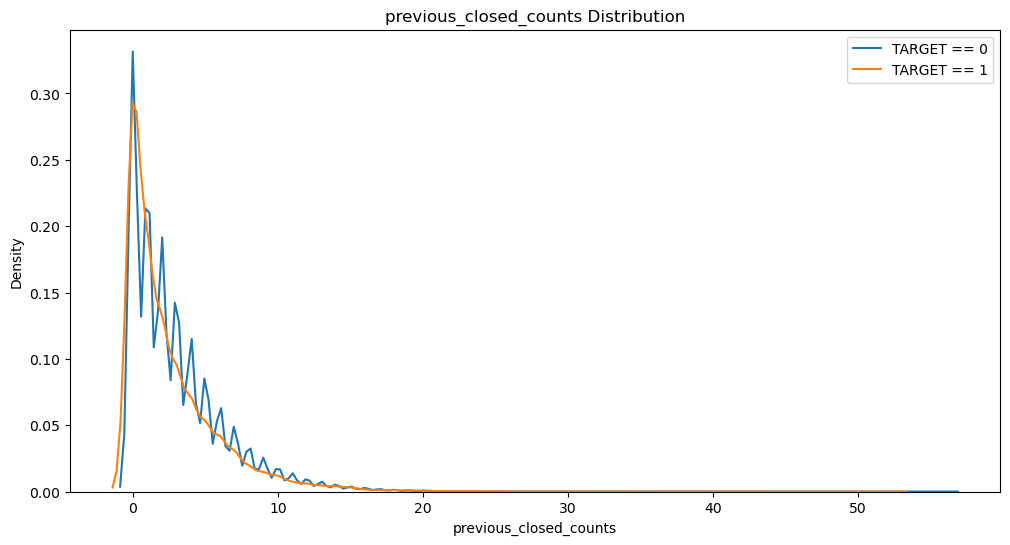

In [80]:
kde_target ('previous_closed_counts', merged_df)

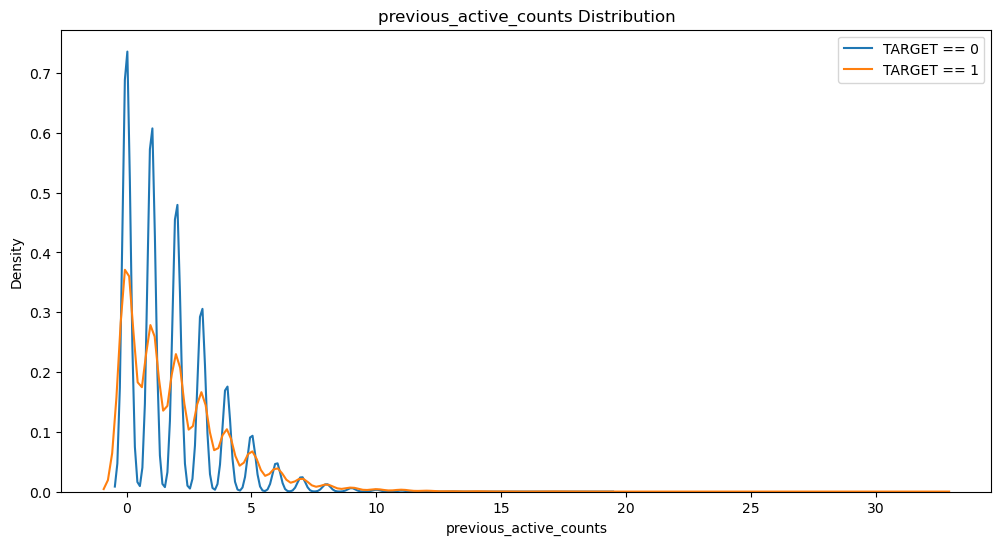

In [81]:
kde_target ('previous_active_counts', merged_df)

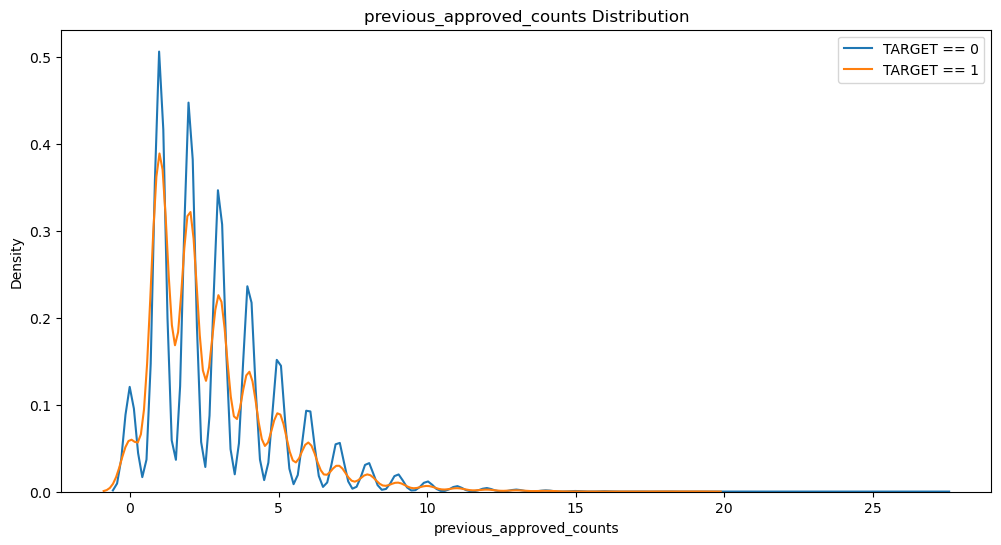

In [82]:
kde_target ('previous_approved_counts', merged_df)

<Axes: xlabel='EXT_SOURCE_2', ylabel='Count'>

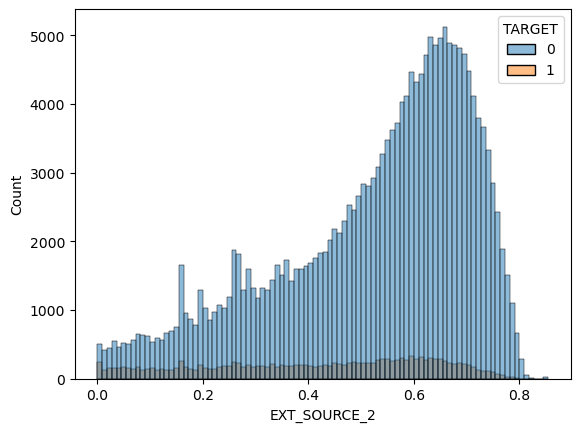

In [83]:
sns.histplot(data=merged_df, x="EXT_SOURCE_2", hue="TARGET")

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
train_val_df, test_df = train_test_split(merged_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [88]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'previous_closed_counts', 'previous_active_counts',
       'previous_approved_counts', 'previous_Canceled_counts',
       'previous_refused_counts'],
      dtype='object')

In [89]:
input_cols= [ 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'previous_closed_counts', 'previous_active_counts',
       'previous_approved_counts', 'previous_Canceled_counts',
       'previous_refused_counts']

target_col = 'TARGET'

In [90]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()
test_inputs1 = test_df1 [input_cols].copy()

In [91]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'previous_closed_counts',
 'previous_active_counts',
 'previous_approved_counts',
 'previous_Canceled_counts',
 'previous_refused_counts']

In [92]:
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()
categorical_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [155]:
#Imputing missing numeric values
merged_df.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         5
AMT_GOODS_PRICE                   197
NAME_TYPE_SUITE                   887
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                   37509
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    136910
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
ORGANIZATION

In [94]:
from sklearn.impute import SimpleImputer

In [95]:
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(merged_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [96]:
imputer.fit(test_df1[numeric_cols])
test_inputs1[numeric_cols] = imputer.transform(test_inputs1[numeric_cols])

In [97]:
train_inputs[numeric_cols].isna().sum()

CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OWN_CAR_AGE                    0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
EXT_SOURCE_1                   0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
APARTMENTS_AVG                 0
previous_closed_counts         0
previous_active_counts         0
previous_approved_counts       0
previous_Canceled_counts       0
previous_refused_counts        0
dtype: int64

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler = MinMaxScaler()
scaler.fit(merged_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [100]:
scaler.fit(test_df1[numeric_cols])
test_inputs1[numeric_cols] = scaler.transform(test_inputs1[numeric_cols])

In [101]:
train_inputs[numeric_cols].describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,previous_closed_counts,previous_active_counts,previous_approved_counts,previous_Canceled_counts,previous_refused_counts
count,124506.000000,124506.000000,124506.000000,124506.000000,124506.000000,124506.000000,124506.000000,124506.000000,124506.000000,124506.000000,...,124506.000000,124506.000000,124506.000000,124506.000000,124506.000000,124506.000000,124506.000000,124506.000000,124506.000000,124506.000000
mean,0.021973,0.007925,0.138242,0.111630,0.124136,0.285264,0.517994,0.866777,0.797581,0.583651,...,0.524574,0.513048,0.601540,0.570884,0.117607,0.053343,0.054916,0.106632,0.014583,0.011794
std,0.038038,0.006048,0.100715,0.063599,0.092250,0.191546,0.245823,0.118263,0.143134,0.209307,...,0.141842,0.147003,0.223125,0.195420,0.076159,0.060093,0.056187,0.080718,0.028438,0.025966
min,0.000000,0.000000,0.000000,0.001654,0.000000,0.003365,0.001578,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.004807,0.056180,0.065370,0.049383,0.134537,0.313078,0.845746,0.695890,0.402807,...,0.434783,0.513746,0.459779,0.464291,0.089700,0.000000,0.000000,0.037037,0.000000,0.000000
50%,0.000000,0.006810,0.116853,0.102012,0.102132,0.257000,0.534188,0.875837,0.817202,0.547798,...,0.521739,0.513746,0.661179,0.571423,0.117530,0.035714,0.031250,0.074074,0.000000,0.000000
75%,0.052632,0.009814,0.190674,0.144306,0.159371,0.392880,0.721646,0.947689,0.918845,0.759900,...,0.608696,0.513746,0.775485,0.711679,0.117530,0.071429,0.093750,0.148148,0.017241,0.014706
max,1.000000,0.749633,1.000000,1.000000,1.000000,1.000000,0.989628,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.691176


In [102]:
#Encoding Categorical Data
merged_df[categorical_cols].nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [103]:
from sklearn.preprocessing import OneHotEncoder

In [106]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(merged_df[categorical_cols])
# Use get_feature_names_out instead of get_feature_names
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\Personal\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

C:\Users\Personal\AppData\Local\Temp\ipykernel_2156\2107132269.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Personal\AppData\Local\Temp\ipykernel_2156\2107132269.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Personal\AppData\Local\Temp\ipyker

In [108]:
# Fit the encoder on your categorical columns
encoder.fit(merged_df[categorical_cols])

# Use get_feature_names_out to get the new column names after encoding
# Note: get_feature_names_out does not require arguments in the latest versions.
encoded_cols = list(encoder.get_feature_names_out())

# Transform the categorical columns with the encoder and assign to the specified columns in test_inputs1
test_inputs1_encoded = encoder.transform(test_inputs1[categorical_cols])
test_inputs1_encoded_df = pd.DataFrame(test_inputs1_encoded, columns=encoded_cols, index=test_inputs1.index)

# Drop the original categorical columns from test_inputs1 and concatenate with the new encoded dataframe
test_inputs1 = pd.concat([test_inputs1.drop(categorical_cols, axis=1), test_inputs1_encoded_df], axis=1)


C:\Users\Personal\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [110]:
# Select the columns to be used for training/prediction
X_train = train_inputs[numeric_cols + encoded_cols]
X_val= val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# Create and train the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)

# Generate predictions and probabilities
train_preds = model.predict(X_train)
train_probs = model.predict_proba(X_train)
accuracy_score(train_targets, train_preds)

0.9196424268709942

In [149]:
X_train

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
87214,0.052632,0.008062,0.126337,0.147574,0.102132,0.088357,0.771308,0.799855,0.997852,0.676949,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
197167,0.000000,0.001052,0.026921,0.036465,0.023569,0.128209,0.474183,0.853729,0.894496,0.978185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73837,0.000000,0.002554,0.102247,0.077755,0.103255,0.392880,0.865051,0.870645,0.957725,0.643740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28750,0.000000,0.002303,0.033281,0.036485,0.029181,0.392880,0.091883,0.866902,0.501702,0.369876,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
120812,0.000000,0.003555,0.124854,0.104099,0.102132,0.392880,0.547520,0.913857,0.716278,0.428929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42932,0.000000,0.009814,0.374787,0.179511,0.326599,0.635991,0.201240,0.933006,0.636025,0.456023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181562,0.000000,0.006059,0.053843,0.128830,0.046016,0.196267,0.827057,0.968624,0.825835,0.661665,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109086,0.000000,0.007311,0.266876,0.186776,0.214366,0.048852,0.345434,0.866902,0.878080,0.635265,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
150992,0.000000,0.018577,0.184000,0.106561,0.158249,0.309272,0.348140,0.783609,0.787613,0.653606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    f1= f1_score (targets,preds)
    print (f1)

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 91.96%
0.026466867762965845


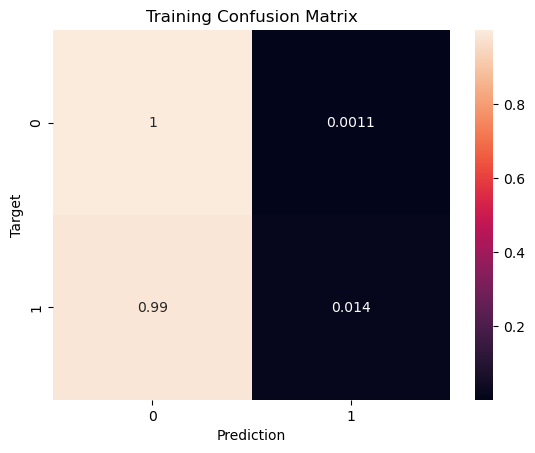

In [112]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Accuracy: 91.98%
0.02974628171478565


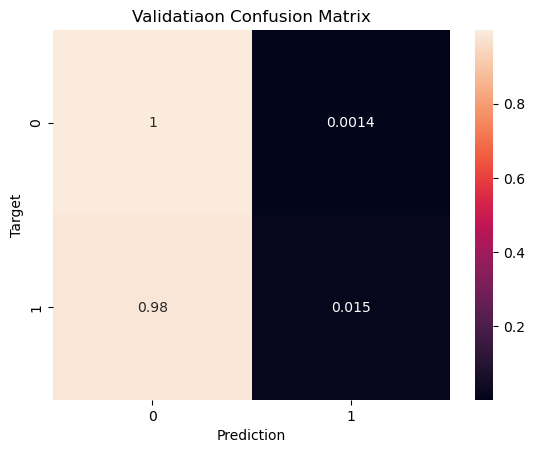

In [113]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 91.82%
0.021337946943483274


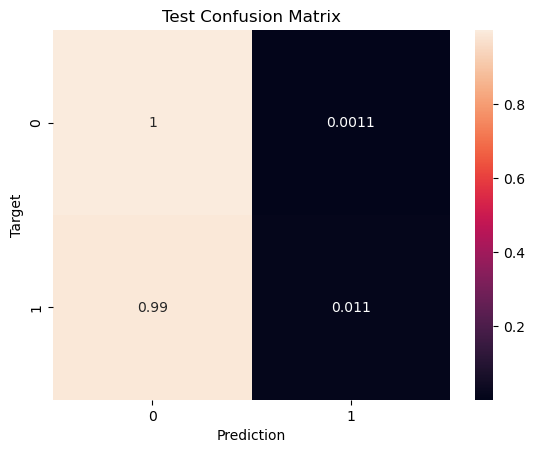

In [114]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

In [115]:
# Select the columns to be used for training/prediction
X_test1 = test_inputs1[numeric_cols + encoded_cols]

# Generate predictions and probabilities
train_preds1 = model.predict(X_test1)

### Training a Decision Tree Classifier Model & Evaluation 

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, train_targets)
train_preds = model.predict(X_train)
accuracy_score(train_targets, train_preds)

1.0

In [118]:
model.score(X_val, val_targets)

0.8550913209001976

In [119]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

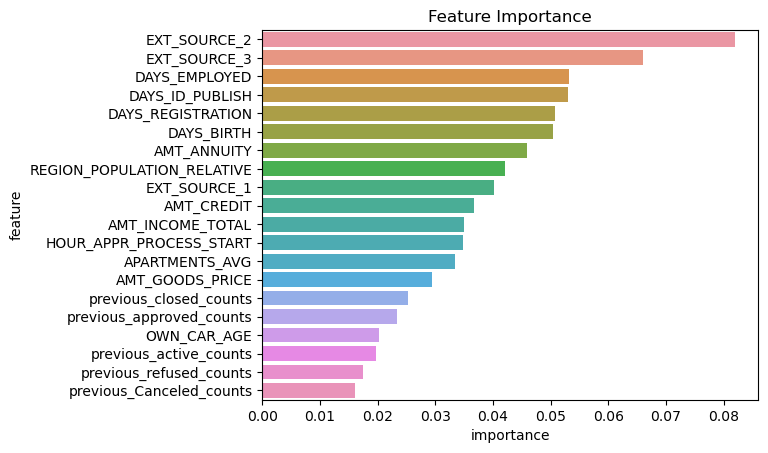

In [120]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(20), x='importance', y='feature');

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(X_train, train_targets)
model.score(X_train, train_targets)

0.9999598412927891

In [123]:
model.score(X_val, val_targets)

0.9201002361331984

In [166]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [169]:
for i in importance_df['feature']:
    print(i)

EXT_SOURCE_3
ORGANIZATION_TYPE_Industry: type 11
EXT_SOURCE_2
CODE_GENDER_M
NAME_CONTRACT_TYPE_Cash loans
NAME_EDUCATION_TYPE_Higher education
NAME_EDUCATION_TYPE_Secondary / secondary special
CODE_GENDER_F
ORGANIZATION_TYPE_Industry: type 3
ORGANIZATION_TYPE_Industry: type 7
NAME_INCOME_TYPE_Working
FLAG_OWN_CAR_N
EXT_SOURCE_1
AMT_GOODS_PRICE
REGION_RATING_CLIENT_W_CITY
NAME_FAMILY_STATUS_Married
previous_refused_counts
AMT_CREDIT
NAME_HOUSING_TYPE_With parents
DAYS_EMPLOYED
previous_approved_counts
ORGANIZATION_TYPE_Government
ORGANIZATION_TYPE_Bank
ORGANIZATION_TYPE_Self-employed
NAME_INCOME_TYPE_State servant
NAME_EDUCATION_TYPE_Lower secondary
NAME_TYPE_SUITE_Family
ORGANIZATION_TYPE_XNA
ORGANIZATION_TYPE_Transport: type 2
previous_active_counts
DAYS_BIRTH
ORGANIZATION_TYPE_Business Entity Type 2
OWN_CAR_AGE
AMT_ANNUITY
ORGANIZATION_TYPE_Construction
previous_closed_counts
ORGANIZATION_TYPE_Transport: type 3
ORGANIZATION_TYPE_Military
NAME_HOUSING_TYPE_House / apartment
REGION_RAT

In [165]:
# Print all column names
print("Column names in the dataset:")
for column in importance_df:
    print(column)

Column names in the dataset:
feature
importance


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame and it already includes only the important features and the target variable
X = df.drop('importance_df', axis=1)
y = df['importance_df
       ']  # Replace 'YourTargetVariableName' with the actual name of your target variable

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

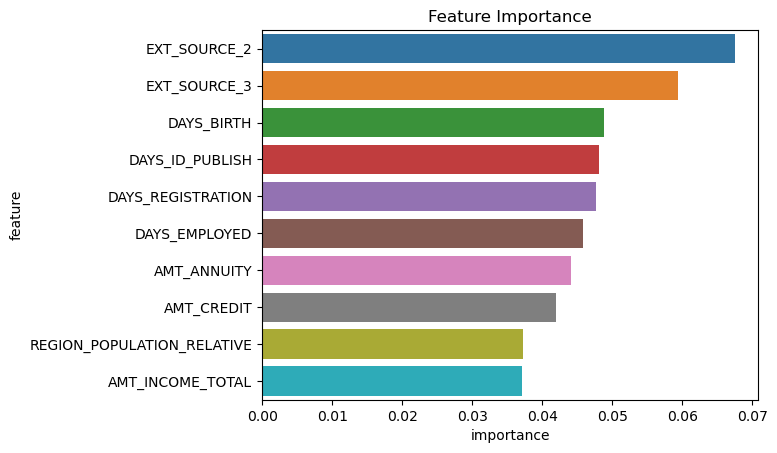

In [125]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [128]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

In [129]:
test_params (n_estimators= 300)

(1.0, 0.9200520456845453)

In [156]:
test_params (n_estimators= 500)

(1.0, 0.9200520456845453)

In [ ]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=400,
                               max_features=7,
                               max_leaf_nodes=2**5,
                               max_depth=5)

In [ ]:
model.fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets), model.score (X_test, test_targets)

In [ ]:
train_preds1 = model.predict(X_test1)

In [ ]:
test_probs= model.predict_proba(X_test1)

In [136]:
test_probs

array([[0.62, 0.38],
       [0.87, 0.13],
       [0.94, 0.06],
       ...,
       [0.95, 0.05],
       [0.93, 0.07],
       [0.89, 0.11]])

In [137]:
test_df1

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,previous_closed_counts,previous_active_counts,previous_approved_counts,previous_Canceled_counts,previous_refused_counts
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,6.0,2.0,1.0,0.0,0.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,School,0.311267,0.622246,NaN,0.0959,3.0,1.0,3.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,Government,NaN,0.555912,0.729567,NaN,2.0,0.0,1.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,Business Entity Type 3,NaN,0.650442,NaN,NaN,0.0,0.0,5.0,3.0,1.0
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,Religion,NaN,0.322738,NaN,NaN,1.0,0.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,Cash loans,F,N,Y,1,157500.0,755190.0,36459.0,675000.0,...,Postal,NaN,0.488676,NaN,NaN,0.0,0.0,2.0,0.0,0.0
99996,216087,Cash loans,F,N,Y,1,225000.0,284400.0,22599.0,225000.0,...,Hotel,0.720055,0.539071,0.576209,0.1830,8.0,1.0,2.0,0.0,0.0
99997,216088,Cash loans,F,Y,Y,0,135000.0,1262583.0,37044.0,1102500.0,...,Self-employed,NaN,0.605584,0.786267,0.1294,2.0,2.0,4.0,1.0,0.0
99998,216089,Cash loans,F,Y,N,0,135000.0,225000.0,6579.0,225000.0,...,Business Entity Type 3,0.398054,0.611289,NaN,0.1155,1.0,0.0,0.0,2.0,0.0


In [138]:
test_df1['TARGET']= list(map(lambda x: x[1], test_probs))

In [ ]:
test_df1

In [139]:
test_df1[['SK_ID_CURR', 'TARGET']].to_csv('submission1.csv', index=None)

### Training a XGBMClassifier Model & Evaluation

In [157]:
from xgboost import XGBClassifier

In [158]:
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, train_targets)
model.score(X_train, train_targets), model.score(X_val, val_targets), model.score (X_test, test_targets)

(0.9261642009220439, 0.9189918558141776, 0.918246873719972)

In [142]:
test_probs2= model.predict_proba(X_test1)
test_df1['TARGET']= list(map(lambda x: x[1], test_probs2))
test_df1[['SK_ID_CURR', 'TARGET']].to_csv('submission2.csv', index=None)

In [143]:
import os
print(os.getcwd())

C:\Users\Personal


In [151]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [174]:
# Assuming your data is for binary classification
n_features = X_train.shape[1]  # Number of features
n_classes = 1  # Set to the number of classes, e.g., 1 for binary classification

model = Sequential([
    Dense(64, input_shape=(n_features,), activation='relu'),  # First hidden layer
    Dropout(0.5),  # Dropout layer to reduce overfitting
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(n_classes, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])


In [173]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [176]:
history = model.fit(X_train, train_targets,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    verbose=1)

Epoch 1/50



3113/3113 [==============================] - 11s 3ms/step - loss: 0.2683 - accuracy: 0.9185 - val_loss: 0.2560 - val_accuracy: 0.9200
Epoch 2/50
3113/3113 [==============================] - 9s 3ms/step - loss: 0.2576 - accuracy: 0.9194 - val_loss: 0.2526 - val_accuracy: 0.9200
Epoch 3/50
3113/3113 [==============================] - 9s 3ms/step - loss: 0.2552 - accuracy: 0.9194 - val_loss: 0.2499 - val_accuracy: 0.9201
Epoch 4/50
3113/3113 [==============================] - 10s 3ms/step - loss: 0.2545 - accuracy: 0.9194 - val_loss: 0.2505 - val_accuracy: 0.9200
Epoch 5/50
3113/3113 [==============================] - 12s 4ms/step - loss: 0.2537 - accuracy: 0.9193 - val_loss: 0.2537 - val_accuracy: 0.9200
Epoch 6/50
3113/3113 [==============================] - 13s 4ms/step - loss: 0.2531 - accuracy: 0.9195 - val_loss: 0.2571 - val_accuracy: 0.9200
Epoch 7/50
3113/3113 [==============================] - 13s 4ms/step - loss: 0.2526 - accuracy: 0.9195 - val_loss: 0.2653 - val_accuracy: 0.920

In [180]:
test_loss, test_acc = model.evaluate(X_val,val_targets, verbose=2)
print('\nTest accuracy:', test_acc)

1297/1297 - 2s - loss: 0.2585 - accuracy: 0.9200 - 2s/epoch - 1ms/step

Test accuracy: 0.9199797511100769


In [181]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, test_targets, verbose=2)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

1297/1297 - 2s - loss: 0.2627 - accuracy: 0.9183 - 2s/epoch - 2ms/step
Test Accuracy: 91.83%


In [186]:
# Predicted probabilities
predicted_probabilities = model.predict(X_test)

# Convert probabilities to class labels using a 0.5 threshold
predicted_classes = (predicted_probabilities > 0.5).astype(int)



1297/1297 [==============================] - 2s 1ms/step


In [187]:
# Create a DataFrame with the predicted classes
predictions_df = pd.DataFrame(predicted_classes, columns=['Predicted_Class'])

# Save the DataFrame to a CSV file
predictions_df.to_csv('final_submission_classes.csv', index=False)


In [190]:
import pandas as pd

# Assuming test_df['SK_ID_CURR'] contains the SK_ID_CURR values for each entry in your test data
output_df = pd.DataFrame({
    'SK_ID_CURR': test_df['SK_ID_CURR'].values,  # Adjust if your variable name is different
    'TARGET': predicted_classes.flatten()  # Use .flatten() to convert from 2D array to 1D if necessary
})

In [191]:
output_df.to_csv('final_submission.csv', index=False)
